# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | holualoa
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | sena madureira
Processing Record 6 of Set 1 | mozarlandia
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | kudahuvadhoo
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | balkanabat
Processing Record 12 of Set 1 | georgievka
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | callao
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | flying fish cove
Processing Record 20 of Set 1 | vila do maio
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 2

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,holualoa,19.6228,-155.9522,23.64,89,85,1.83,US,1724825382
1,port-aux-francais,-49.3500,70.2167,5.40,97,100,13.80,TF,1724825384
2,waitangi,-43.9535,-176.5597,11.01,96,100,4.92,NZ,1724825385
3,puerto natales,-51.7236,-72.4875,3.84,82,91,6.39,CL,1724825386
4,sena madureira,-9.0656,-68.6569,20.93,57,1,0.49,BR,1724825387


In [10]:
# Export the City_Data into a csv
if not os.path.exists("output_data"):
    os.makedirs("output_data")
    
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,holualoa,19.6228,-155.9522,23.64,89,85,1.83,US,1724825382
1,port-aux-francais,-49.3500,70.2167,5.40,97,100,13.80,TF,1724825384
2,waitangi,-43.9535,-176.5597,11.01,96,100,4.92,NZ,1724825385
3,puerto natales,-51.7236,-72.4875,3.84,82,91,6.39,CL,1724825386
4,sena madureira,-9.0656,-68.6569,20.93,57,1,0.49,BR,1724825387


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

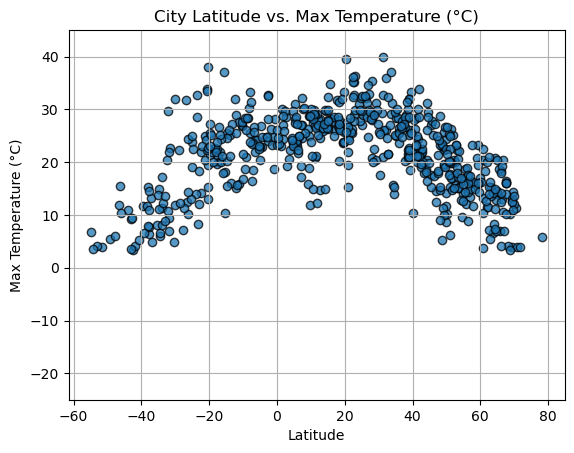

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

plt.ylim(-25, 45) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

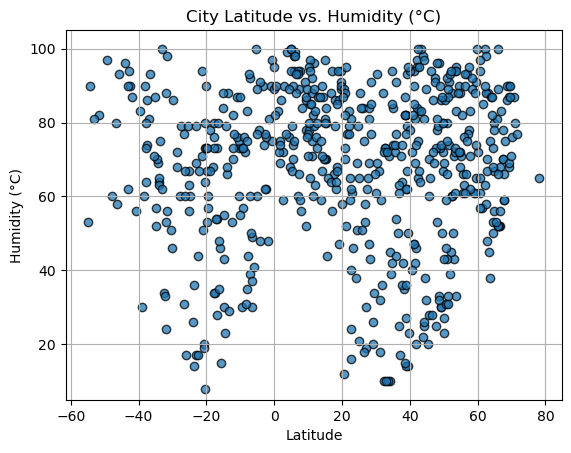

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (°C)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (°C)")
plt.grid(True)

plt.ylim(5, 105) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

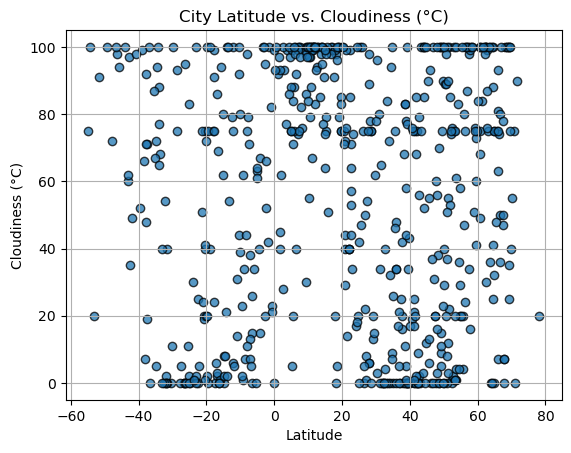

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (°C)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (°C)")
plt.grid(True)

plt.ylim(-5, 105) 
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

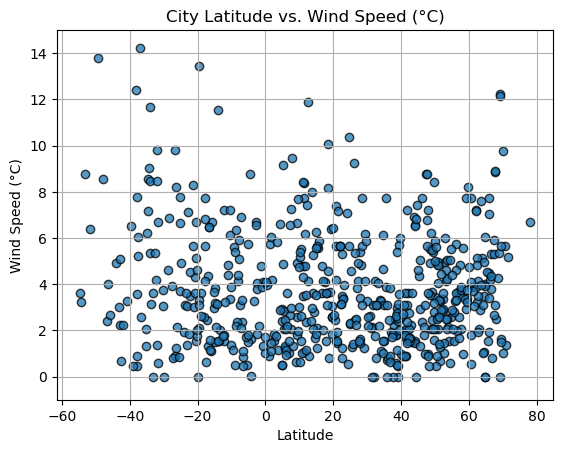

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (°C)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (°C)")
plt.grid(True)

plt.ylim(-1, 15) 
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, output_path):
  
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = r_value**2
    
    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolors='black', alpha=0.75)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", linewidth=2)

    # Add labels, title, and regression equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

    print(f"The R² value is: {r_squared:.16f}")
    
    # Save and show plot
    plt.savefig(output_path)
    plt.show()

   

In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,holualoa,19.6228,-155.9522,23.64,89,85,1.83,US,1724825382
7,kudahuvadhoo,2.6708,72.8944,28.53,72,28,1.56,MV,1724825391
9,hawaiian paradise park,19.5933,-154.9731,23.73,94,75,2.57,US,1724825393
10,balkanabat,39.5108,54.3671,33.36,14,0,5.70,TM,1724825394
11,georgievka,49.3314,81.5761,22.28,30,5,5.38,KZ,1724825395


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.40,97,100,13.80,TF,1724825384
2,waitangi,-43.9535,-176.5597,11.01,96,100,4.92,NZ,1724825385
3,puerto natales,-51.7236,-72.4875,3.84,82,91,6.39,CL,1724825386
4,sena madureira,-9.0656,-68.6569,20.93,57,1,0.49,BR,1724825387
5,mozarlandia,-14.7447,-50.5706,25.56,30,0,3.85,BR,1724825388


###  Temperature vs. Latitude Linear Regression Plot

The R² value is: 0.4192892245704523


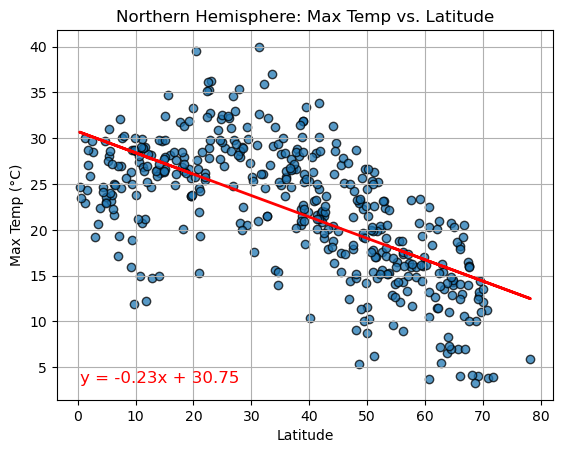

In [74]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp (°C)",
    "Northern Hemisphere: Max Temp vs. Latitude",
    "output_data/Northern_Temp_vs_Lat_Regression.png"
)


The R² value is: 0.5104205714034843


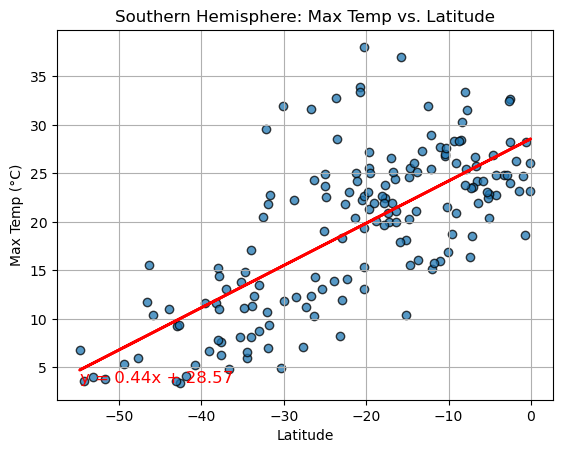

In [75]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere for Temperature vs. Latitude
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp (°C)",
    "Southern Hemisphere: Max Temp vs. Latitude",
    "output_data/Southern_Temp_vs_Lat_Regression.png"
)


**Discussion about the linear relationship:** The linear regression plot of the northern hemisphere for the maximum temperature and latitutude shows a negative relationship. So, as the latitude increases the maximum temperature typically decreases too. The R^2 value shows that about 41.9% of variation in the maximum temperature can be attributed to the latitude.

The linear regression plot for the southern hemisphere displays a positive linear relationship of maximum temperature and latitude. As latitude increases, the maximum temperatures tend to as well. The R^2 values shows that about 51.0% of the variation in maximum temperature can be attributed to the latitude. 

For the northern hemisphere, this makes sense as the latitude increases, it moves away from the equator and to the poles, which can considerably affect temperature downwards. For the southern hemisphere, it also makes sense due to temperatures typically increasing when moving towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The R² value is: 0.0084415468351466


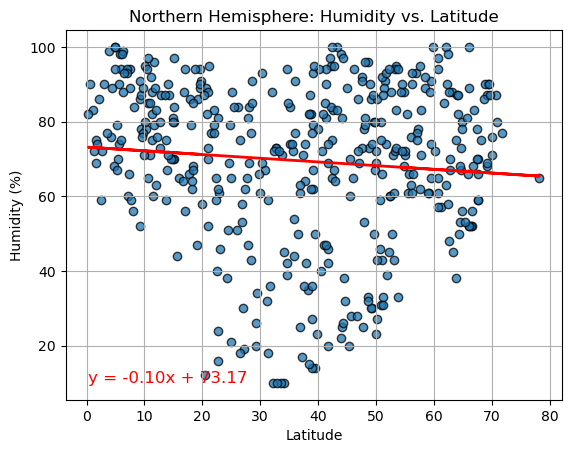

In [76]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere: Humidity vs. Latitude",
    "output_data/Northern_Humidity_vs_Lat_Regression.png"
)


The R² value is: 0.0078790732793004


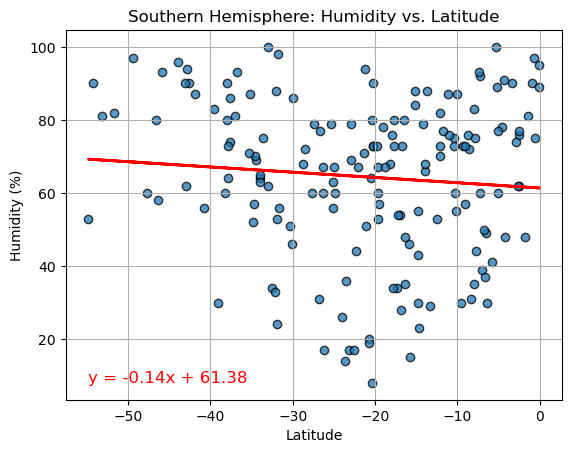

In [77]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere: Humidity vs. Latitude",
    "output_data/Southern_Humidity_vs_Lat_Regression.png"
)


**Discussion about the linear relationship:** For the northern hemisphere's linear regression plot for humidity and latitude, the plot shows a generally inconsistent negative linear relationship between latitude and humidity. The R^2 value is relatively low and displays basically no relationship between the two, or that about 0.84% of the variation in humidity is related to latitude. 

For the southern hemisphere's linear regression plot for humidity and latitude, it too shows a inconsistent and negative linear relationship between humidity and latitude, with a R^2 value depicting that 0.8% of the variation in humidity is due to latitude. 

Both plots display that latitude has almost no effect in determining humidity levels, but rather other environmental factors do.

### Cloudiness vs. Latitude Linear Regression Plot

The R² value is: 0.0473134432496448


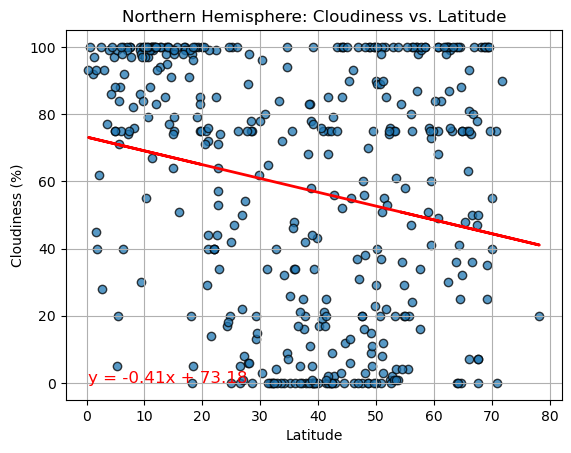

In [78]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere: Cloudiness vs. Latitude",
    "output_data/Northern_Cloudiness_vs_Lat_Regression.png"
)


The R² value is: 0.0262028099202648


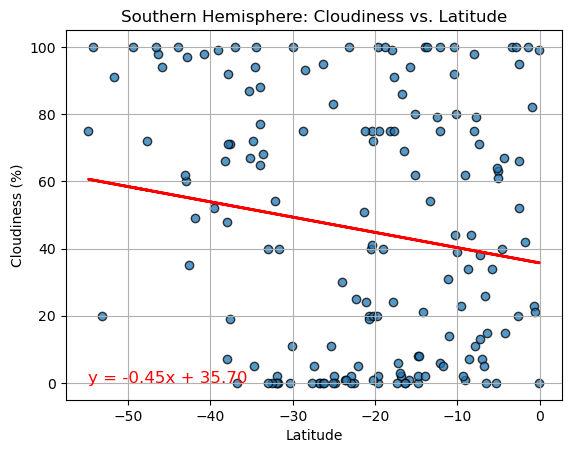

In [79]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere: Cloudiness vs. Latitude",
    "output_data/Southern_Cloudiness_vs_Lat_Regression.png"
)


**Discussion about the linear relationship:** The linear regression plot for the northern hemisphere between cloudiness and latitude displays a inconsistent and negative linear relationship. The R^2 value indicates a 4.7% in the variation of cloudiness that can be correlated to latitude.

For the linear regression plot in the southern hemisphere, again, there is an inconsistent and negative linear relationship. The R^2 value approximates that about 2.6% of the variation in cloudiness can be explained by the latitude. 

Both indicate that cloudiness is not significantly dependent on latitude, and the cloudiness is most likely influenced by other environmental factors.

### Wind Speed vs. Latitude Linear Regression Plot

The R² value is: 0.0024527951487610


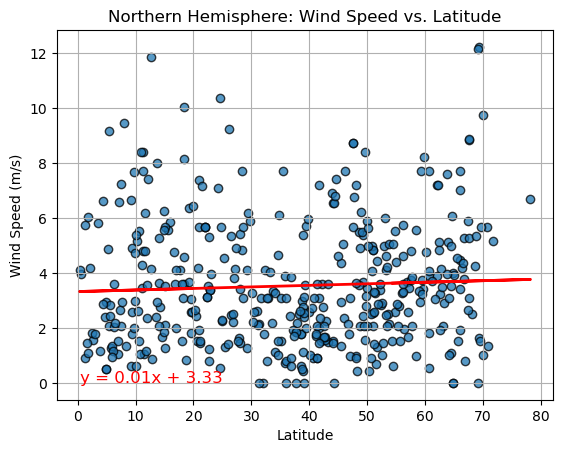

In [80]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Northern Hemisphere: Wind Speed vs. Latitude",
    "output_data/Northern_WindSpeed_vs_Lat_Regression.png"
)


The R² value is: 0.0531028245103494


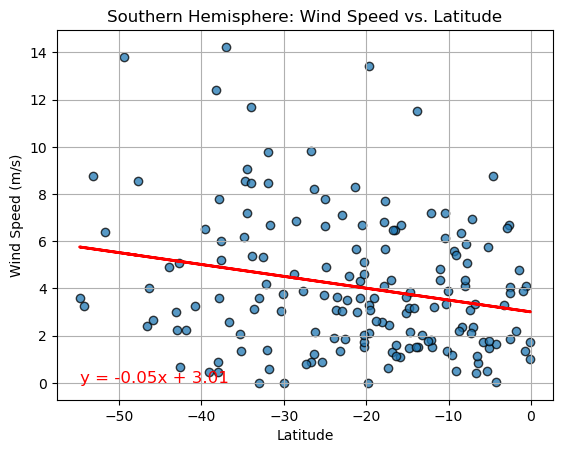

In [81]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Southern Hemisphere: Wind Speed vs. Latitude",
    "output_data/Southern_WindSpeed_vs_Lat_Regression.png"
)


**Discussion about the linear relationship:** For the linear regression plot in the northern hemisphere, there is a considerably weak negative relationship betweeen wind speed and latitude. The R^2 value indicates tha there is about a 0.2% of the variation in wind speed that can be traced back to latitude.

The linear regression plot in the southern hemisphere for wind speed and latitude, shows a weak and negative relationship between the two. The R^2 value depicts an approximate 5.3% of variation in wind speed being related to the latitude. 

Latitude is not a effective predictor of wind speed, but rather other environmental and atmospheric components are more likely to be more related to the wind speed's variation. 